 Customize date formats on a plot created with matplotlib in Python.

# Lesson 5. Customize Dates on Time Series Plots in Python Using Matplotlib

### How to Reformat Date Labels in Matplotlib

matplotlib provides functionality to change the format of a date on a plot axis using the DateFormatter module, so that you can customize the look of your labels without having to rotate them.

Using the DateFormatter module from matplotlib, you can specify the format that you want to use for the date using the syntax: "%X %X" where each %X element represents a part of the date as follows:

- %Y - 4 digit year with upper case Y
- %y - 2 digit year with lower case y
- %m - month as a number with lower case m
- %b - month as abbreviated name with lower case b
- %d - day with lower case d

You can also add a character between the "%X %X" to specify how the values are connected in the label such as - or \.

In [15]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import earthpy as et
import numpy as np
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

# Import data using datetime and no data value
precip_2003_2013_daily = pd.read_csv(file_path,
                                     parse_dates=['DATE'],
                                     index_col= ['DATE'],
                                     na_values=['999.99'])

In [2]:
# Import data using datetime and no data value
precip_2003_2013_daily = pd.read_csv('C:/capes_sql/colorado-flood/precipitation/805325-precip-dailysum-2003-2013.csv',
                                     parse_dates=['DATE'],
                                     index_col= ['DATE'],
                                     na_values=['999.99'])

Now, subset the data to time period June 1, 2005 - August 31, 2005 and plot the data without rotating the labels along the x-axis.

In [3]:
# Subset data to June-Aug 2005
precip_june_aug_2005 = precip_2003_2013_daily['2005-06-01':'2005-08-31']

precip_june_aug_2005.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2005-06-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,152
2005-06-02,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,153
2005-06-03,0.3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,154
2005-06-04,0.7,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,155
2005-06-09,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,160


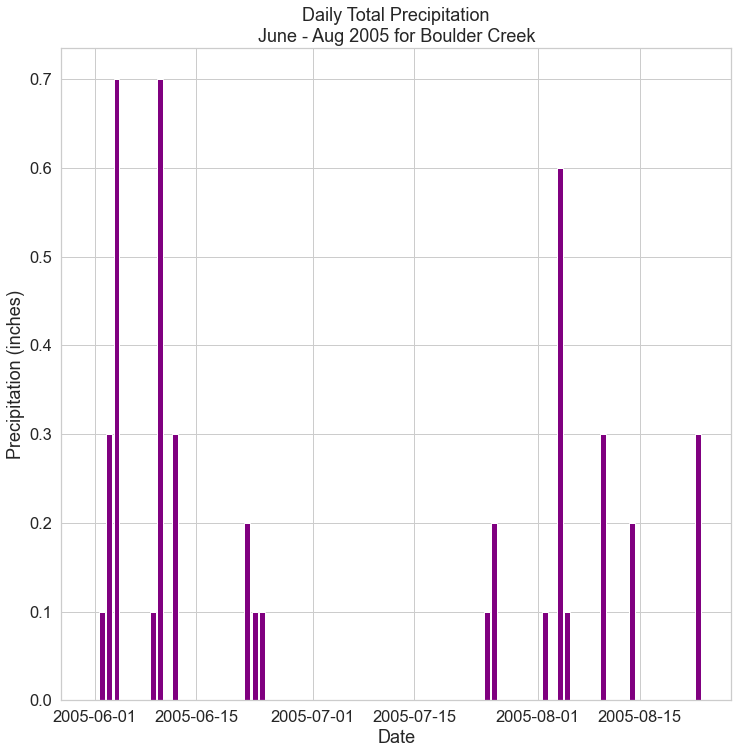

In [4]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
       precip_june_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

plt.show()

# Use DateFormatter to Reformat Date Labels in Matplotlib

### date_form = DateFormatter("%m-%d")

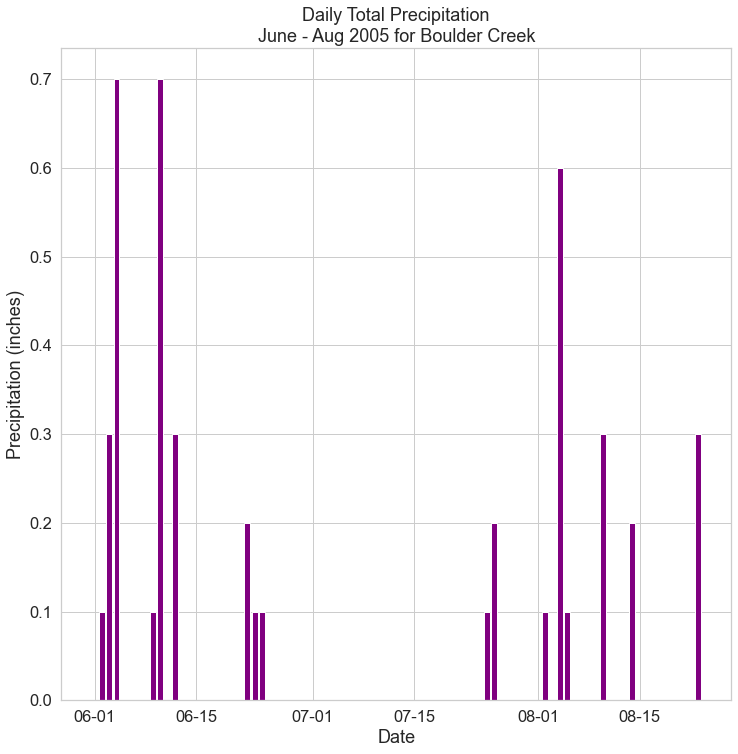

In [6]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
       precip_june_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.show()

## Modify Frequency of Date Label Ticks

Using a parameter to this function, you can specify that you want a large tick for each week with: mdates.WeekdayLocator(interval=1)

The interval is an integer that represents the weekly frequency of the ticks (e.g. a value of 2 to add a tick mark for every other week).



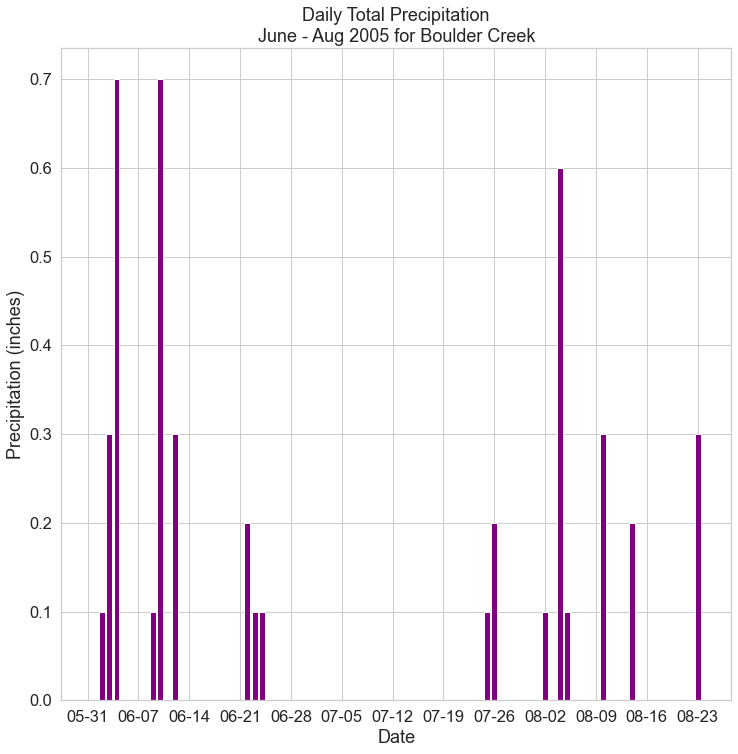

In [7]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
       precip_june_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)#use ticks to indicate each new week

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()


Note that you can also specify the start and end of the labels by adding a parameter to ax.set for xlim such as:

xlim=["2005-06-01", "2005-08-31"]

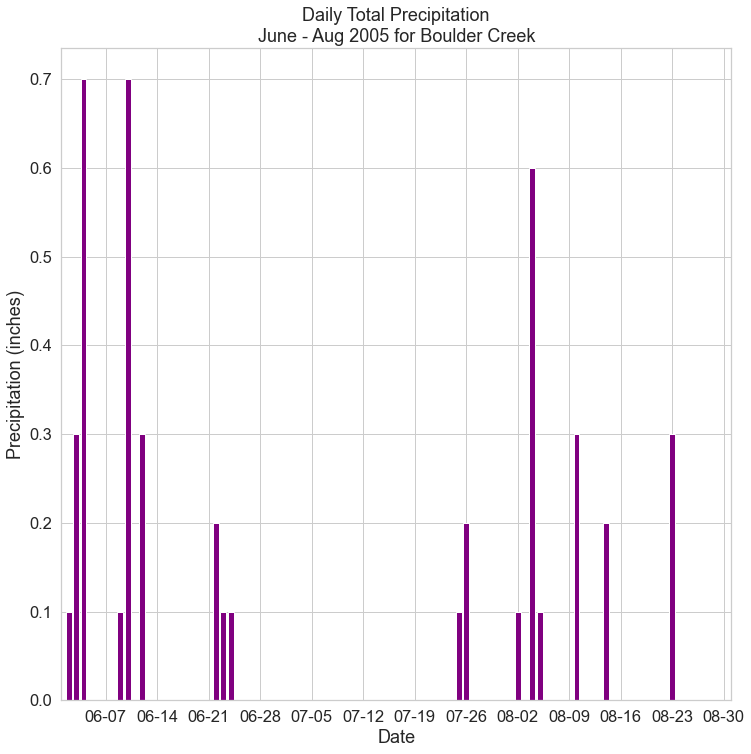

In [8]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
       precip_june_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek",
       xlim=["2005-06-01", "2005-08-31"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

# Exercices

Create plots for the following time subsets for the year of the September 2013 flood and the year before the flood:

- Time period A: 2012-08-01 to 2012-11-01
- Time period B: 2013-08-01 to 2013-11-01

https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

In [29]:
precip_2012_08_01_2012_11_01 = precip_2003_2013_daily['2012-08-01':'2012-11-01']
precip_2013_08_01_2013_11_01 = precip_2003_2013_daily['2013-08-01':'2013-11-01']

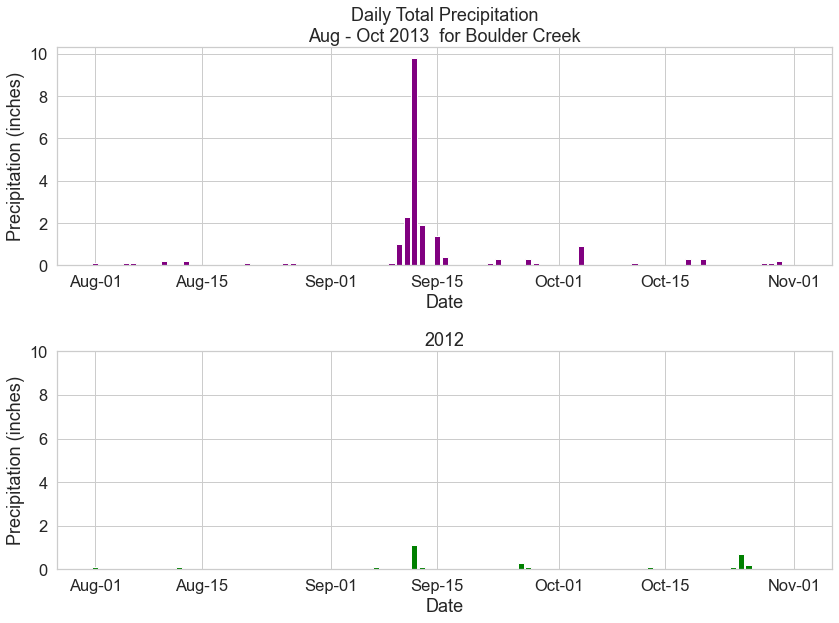

In [39]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(12,9))

# Add x-axis and y-axis
ax1.bar(precip_2013_08_01_2013_11_01.index.values,
       precip_2013_08_01_2013_11_01['DAILY_PRECIP'],
       color='purple')

ax1.title.set_text("2013")

ax2.bar(precip_2012_08_01_2012_11_01.index.values,
       precip_2012_08_01_2012_11_01['DAILY_PRECIP'],
       color='green')

# Define the date format
date_form = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form)

# Define the date format
date_form = DateFormatter("%b-%d")
ax2.xaxis.set_major_formatter(date_form)

# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nAug - Oct 2013  for Boulder Creek",
      )
ax2.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nAug - Oct 2012  for Boulder Creek",
      )

ax2.title.set_text("2012")
ax2.set(ylim=[0, 10])
plt.tight_layout()